In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df=pd.read_csv('play_tennis_train.csv')

le_outlook=LabelEncoder()
le_outlook.fit(df['outlook'])

le_temp=LabelEncoder()
le_temp.fit(df['temp'])

le_humidity=LabelEncoder()
le_humidity.fit(df['humidity'])

le_wind=LabelEncoder()
le_wind.fit(df['wind'])

le_play=LabelEncoder()
le_play.fit(df['play'])

df['outlook_num']=le_outlook.transform(df['outlook'])
df['temp_num']=le_temp.transform(df['temp'])
df['humidity_num']=le_humidity.transform(df['humidity'])
df['wind_num']=le_wind.transform(df['wind'])
df['play_num']=le_play.transform(df['play'])

df.to_csv('my_play_tennis_train_encoded.csv')


In [9]:
for i in le_outlook.classes_:
    print(i,le_outlook.transform([i])[0])
for i in le_temp.classes_:
    print(i,le_temp.transform([i])[0])
for i in le_humidity.classes_:
    print(i,le_humidity.transform([i])[0])
for i in le_wind.classes_:
    print(i,le_wind.transform([i])[0])
for i in le_play.classes_:
    print(i,le_play.transform([i])[0])

Overcast 0
Rain 1
Sunny 2
Cool 0
Hot 1
Mild 2
High 0
Normal 1
Strong 0
Weak 1
No 0
Yes 1


In [10]:
from sklearn.tree import DecisionTreeClassifier

X=df[['outlook_num','temp_num','humidity_num','wind_num']]
y=df['play_num']

model=DecisionTreeClassifier(criterion='entropy')
model.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

In [16]:
newDay=['Sunny','Cool', 'High','Weak']

outlook=newDay[0]
temp=newDay[1]
humidity=newDay[2]
wind=newDay[3]

outlook_num=le_outlook.transform([outlook])[0]
temp_num=le_temp.transform([temp])[0]
humidity_num=le_humidity.transform([humidity])[0]
wind_num=le_wind.transform([wind])[0]

newDay_num=[[outlook_num,temp_num,humidity_num,wind_num]]
print(newDay_num)

day_info=pd.DataFrame(newDay_num,columns=['outlook_num','temp_num','humidity_num','wind_num'])

pred_code= model.predict(day_info)
print(pred_code)

pred_class=le_play.inverse_transform([pred_code])[0]
print (pred_class)

[[2, 0, 0, 1]]
[0]
No


c:\Users\asus\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
from sklearn import tree

text_representation=tree.export_text(model)
print(text_representation)

|--- feature_0 <= 0.50
|   |--- class: 1
|--- feature_0 >  0.50
|   |--- feature_2 <= 0.50
|   |   |--- feature_0 <= 1.50
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  0.50
|   |   |   |   |--- class: 1
|   |   |--- feature_0 >  1.50
|   |   |   |--- class: 0
|   |--- feature_2 >  0.50
|   |   |--- feature_3 <= 0.50
|   |   |   |--- feature_0 <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  1.50
|   |   |   |   |--- class: 1
|   |   |--- feature_3 >  0.50
|   |   |   |--- class: 1



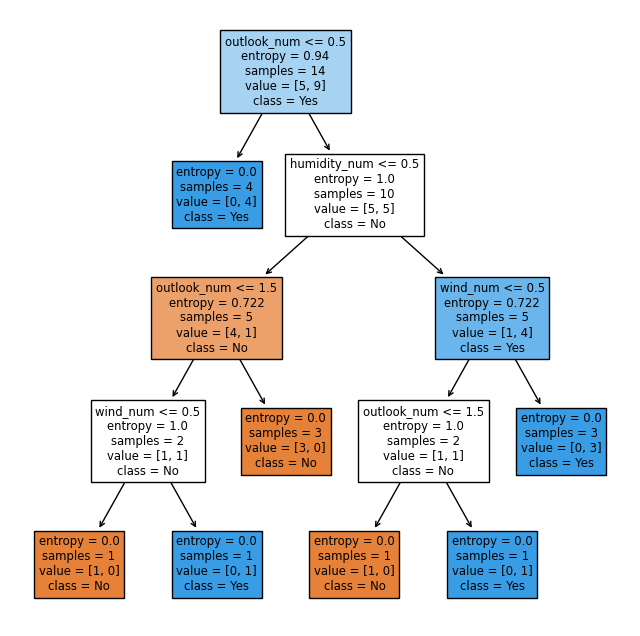

In [21]:
future_names=['outlook_num','temp_num','humidity_num','wind_num']
target_names=['No','Yes']

from matplotlib import pyplot

fig=pyplot.figure(figsize=(8,8))
_= tree.plot_tree(model,feature_names=future_names,class_names=target_names,filled=True)

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score

y_pred=model.predict(X)

cf_matrix=confusion_matrix(y_pred,y,labels=[0,1])
print('confusion_matrix')
print(cf_matrix)

TP=cf_matrix[0][0]
TN=cf_matrix[1][1]
FP=cf_matrix[0][1]
FN=cf_matrix[1][0]

print('TP ',TP)
print('TN ',TN)
print('FP ',FP)
print('FN ' ,FN)

print ('Accuracy Score :{:.2f}'.format(accuracy_score(y_pred, y)*100))
print ('Precision Score :{:.2f}'.format(precision_score(y_pred, y, pos_label=0)*100))
print ('Recall Score :{:.2f}'.format(recall_score(y_pred, y, pos_label=0)*100))
print ('F1 Score :{:.2f}'.format(f1_score(y_pred, y, pos_label=0)*100))
print ('Specificity :{:.2f}'.format(FP/(FP+TN)*100))

confusion_matrix
[[5 0]
 [0 9]]
TP  5
TN  9
FP  0
FN  0
Accuracy Score :100.00
Precision Score :100.00
Recall Score :100.00
F1 Score :100.00
Specificity :0.00
